> **Student Names and IDs**:
>
> - Newton Kwan, nk150 

# Homework 5

## Part 1: Numerical Differentiation

### Problem 1.1

Write a formula for the Jacobian $J_{P2C}$ of this transformation.

### Answer

$$
J_{P2C} = 
\left[\begin{array}{cc}
cos\phi & -rsin\phi \\
sin\phi & rcos\phi
\end{array}\right]
$$

### Problem 1.2

Write functions with headers

    def P2C(z):
    
and

    def JacobianP2C(z):
    
that compute the transformation above and its Jacobian matrix. Inputs and outputs should be `numpy` arrays.

Show your code. You will test it in a later problem.

### Answer

In [647]:
import numpy as np

In [648]:
def P2C(z):
    '''
    This function transforms from polar to cartesian. Concretely, from r and phi to x and y 
    Inputs: z, a numpy array of r and phi  
    Outputs: c, a numpy array of x and y
    '''
    r = z[0]
    phi = z[1]
    a = np.zeros(z.shape)
    a[0] = r*np.cos(phi)
    a[1] = r*np.sin(phi)
    
    return a

In [649]:
def JacobianP2C(z):
    '''
    This function returns the Jacobian of a transformation from polar to cartesian
    Input: numpy arrays, z = (2,)
    Output: numpy arrays 
    '''
    r = z[0]
    phi = z[1]
    a = np.zeros((2,2))
    a[0][0] = np.cos(phi)
    a[0][1] = -r*np.sin(phi)
    a[1][0] = np.sin(phi)
    a[1][1] = r*np.cos(phi)
    return a 

### Problem 1.3

Write a Python function with header

    def Jacobian(f, z, delta=1e-5):
    
that takes a function `f` from $\mathbb{R}^d$ to $\mathbb{R}^e$, a `numpy` vector `z` with $d$ entries, and an optional value for $\delta$ and returns a `numpy` array with the Jacobian of `f` at `z`, using the central difference formula given above.

Show your code. You will test it in the next problem.

### Answer

In [650]:
def Jacobian(f, z, delta=1e-5):
    '''
    
    Input: f, function
    z, numpy vector with d entries 
    delta, optional value for small distance 
    Output: numpy array of Jacobian of f at z using central difference that is (e,d)
    '''
    e = f(z).size            # length of f(z)
    d = z.size               # length of z 
    j = np.zeros((e, d))     # (e,d)
    eye = np.identity(d)     # (d,d) identity matrix 

    for i in range(d):
        e_i = eye[i]
        df = (f(z + e_i*delta) - f(z - e_i*delta)) / (2*delta) # e 
        j[:, i] = df
    
    return j 

### Problem 1.4

Show the result of running the tests below. This will happen automatically once your functions `Jacobian`, `P2C`, and `JacobianP2C`, are defined correctly (and you run the cell below).

### Answer

In [651]:
def compare(a, f, b, delta=1e-5):
    def a2s(a):
        def n2s(x):
            return '{:g}'.format(round(x, 4))
        
        try:
            return '[' + '; '.join([', '.join([n2s(y) for y in row]) for row in a]) + ']'
        except TypeError:
            try:
                return '[' + ', '.join([n2s(y) for y in a]) + ']'
            except TypeError:
                return '[]' if a.size == 0 else n2s(a)

    aName, fName, bName = a.__name__, f.__name__, b.__name__
    msgBase = '{:s}({:s}, {{:s}}) = {{:s}}\n{:s}({{:s}}) = {{:s}}'
    msg = msgBase.format(aName, fName, bName)
    zs = np.array([[0, 0], [1, 0], [2, 1], [2, 2]])
    for z in zs:
        print(msg.format(a2s(z), a2s(a(f, z, delta)), a2s(z), a2s(b(z))), end='\n\n')

try:
    compare(Jacobian, P2C, JacobianP2C)
except NameError:
    pass

Jacobian(P2C, [0, 0]) = [1, 0; 0, 0]
JacobianP2C([0, 0]) = [1, 0; 0, 0]

Jacobian(P2C, [1, 0]) = [1, 0; 0, 1]
JacobianP2C([1, 0]) = [1, -0; 0, 1]

Jacobian(P2C, [2, 1]) = [0.5403, -1.6829; 0.8415, 1.0806]
JacobianP2C([2, 1]) = [0.5403, -1.6829; 0.8415, 1.0806]

Jacobian(P2C, [2, 2]) = [-0.4161, -1.8186; 0.9093, -0.8323]
JacobianP2C([2, 2]) = [-0.4161, -1.8186; 0.9093, -0.8323]



### Problem 1.5

Use the fact that the Hessian is the Jacobian of the gradient to write a Python function with header

    def Hessian(f, x, delta=1e-5):
    
that uses your `gradient` function to compute the Hessian of `f` at `x`. Show your code.

### Answer

In [652]:
def Hessian(f, x, delta=1e-5):
    d = x.size
    H = np.zeros((d, d))           # (d,d)
    J = Jacobian(f, x, delta=1e-5) # (1,d) with first derivatives
    J = J.reshape((d,))            # reshape so that we can reuse J 
    H = Jacobian(lambda x: Jacobian(f, x, delta=1e-5), x, delta=1e-5)
    return H

### Problem 1.6

Show the result of running the tests below. This will happen automatically once your function `Hessian` is defined correctly (and you run the cell below).

### Answer

In [653]:
shift, scale = [2, 1], 10

def f(z):
    d = z - shift
    return np.array(np.inner(z, z) / scale + np.exp(-np.inner(d, d)))

def gradientF(z):
    d = z - shift
    return 2 * (z / scale - d * np.exp(-np.inner(d, d)))


def HessianF(z):    
    I = np.eye(2)
    d = z - shift
    return 2 * (I / scale + (2 * np.outer(d, d) - I) * np.exp(-np.inner(d, d)))

try:
    compare(Jacobian, f, gradientF)
    compare(Hessian, f, HessianF)
except NameError:
    pass

Jacobian(f, [0, 0]) = [0.027, 0.0135]
gradientF([0, 0]) = [0.027, 0.0135]

Jacobian(f, [1, 0]) = [0.4707, 0.2707]
gradientF([1, 0]) = [0.4707, 0.2707]

Jacobian(f, [2, 1]) = [0.4, 0.2]
gradientF([2, 1]) = [0.4, 0.2]

Jacobian(f, [2, 2]) = [0.4, -0.3358]
gradientF([2, 2]) = [0.4, -0.3358]

Hessian(f, [0, 0]) = [0.2943, 0.0539; 0.0539, 0.2135]
HessianF([0, 0]) = [0.2943, 0.0539; 0.0539, 0.2135]

Hessian(f, [1, 0]) = [0.4707, 0.5413; 0.5413, 0.4707]
HessianF([1, 0]) = [0.4707, 0.5413; 0.5413, 0.4707]

Hessian(f, [2, 1]) = [-1.8, 0; 0, -1.8]
HessianF([2, 1]) = [-1.8, 0; 0, -1.8]

Hessian(f, [2, 2]) = [-0.5358, -0; -0, 0.9358]
HessianF([2, 2]) = [-0.5358, 0; 0, 0.9358]



### Problem 1.7

Write one clear and concise sentence to describe which results are good and which are not in the tests below.

In [654]:
try:
    delta = 1e-9
    compare(Jacobian, f, gradientF, delta)
    compare(Hessian, f, HessianF, delta)
except NameError:
    pass

Jacobian(f, [0, 0]) = [0.027, 0.0135]
gradientF([0, 0]) = [0.027, 0.0135]

Jacobian(f, [1, 0]) = [0.4707, 0.2707]
gradientF([1, 0]) = [0.4707, 0.2707]

Jacobian(f, [2, 1]) = [0.4, 0.2]
gradientF([2, 1]) = [0.4, 0.2]

Jacobian(f, [2, 2]) = [0.4, -0.3358]
gradientF([2, 2]) = [0.4, -0.3358]

Hessian(f, [0, 0]) = [0.2943, 0.0539; 0.0539, 0.2135]
HessianF([0, 0]) = [0.2943, 0.0539; 0.0539, 0.2135]

Hessian(f, [1, 0]) = [0.4707, 0.5413; 0.5413, 0.4707]
HessianF([1, 0]) = [0.4707, 0.5413; 0.5413, 0.4707]

Hessian(f, [2, 1]) = [-1.8, 0; 0, -1.8]
HessianF([2, 1]) = [-1.8, 0; 0, -1.8]

Hessian(f, [2, 2]) = [-0.5358, -0; -0, 0.9358]
HessianF([2, 2]) = [-0.5358, 0; 0, 0.9358]



### Answer

All of the results are good. 

## Part 2: Steepest Descent

### Problem 2.1

Using the imports and definition in the cell below, write a function with header

    def lineSearch(f, g, z0):

that performs line search on the function `f`, whose gradient is computed by the function `g`, starting at point `z0`. If the starting point $\mathbf{z}_0$ is in $\mathbb{R}^d$, then functions $f$ and $g$ have the following signatures:

$$
f\ :\ \mathbb{R}^d \rightarrow \mathbb{R} \;\;\;\;\;\text{and}\;\;\;\;\;
g\ :\ \mathbb{R}^d \rightarrow \mathbb{R}^d
$$

Show your code, and the result of running the function with the function $f$ and value `z0` defined below. Defining the corresponding gradient $g$ is your task.

In [655]:
from scipy import optimize as opt
import numpy as np
import math
import matplotlib.pyplot as plt

small = math.sqrt(np.finfo(float).eps)

f, z0 = lambda z: -np.sin(z), 0

### Answer

In [656]:
# gradient function 
def g(z):
    return -np.cos(z)

In [657]:
def lineSearch(f, g, z0):
    '''
    This function performs line search on the function f, whose gradient is computed by the function g, starting at point z0.
    a_k, the distance we travel on the line h(a_k)
    z_k+1, the input of the minimumm of f(z) found using line search (the next step to take)
    Outputs: z, the next step of steepest descent 
    '''
    mag_g = np.linalg.norm(g(z0)) # magnitude of gradient of f at z0 
    if mag_g < small:
        return z0
    def hi(c):                   # function h from R to R 
        return f(z0 + c*(-g_i))
    
    # Find the third element c of the bracketing triplet 
    g_i = g(z0)
    c = small                   # starting value for c 
    h_prev =  f(z0 + c*(-g_i))  # initial h(c)
    c *= 1.2                       
    h = f(z0 + c*(-g_i))        # next h(c)
    while h < h_prev: 
        c *= 1.2
        h_prev = h 
        h = f(z0 + c*(-g_i))
        if c > 100:
            print("Error: c > 100")
            return z0     
    # now we should have a c in which h_prev(c) < h(c)
    a = 0 
    bracket = (a,c)
    b = opt.minimize_scalar(hi, bounds = bracket, method = 'bounded')
    z_next = z0 - (b.x * g_i) 
        
    return z_next

In [658]:
answer = lineSearch(f, g, z0)
print("Running lineSearch with f and z0 returns a value of z =",answer)

Running lineSearch with f and z0 returns a value of z = 1.5707961264726962


### Problem 2.2

Write a function with header

    def steepest(f, g, z0, maxK=10000, delta=small, remember=False):
    
that uses your `lineSearch` function to implement steepest descent with line search.

Show your code and the value of $\mathbf{z}$ that results from minimizing the provided function `Rosenbrock` with `steepest`. Start the minimization at $\mathbf{z}_0 = (-1.2, 1)$ (defined below), and use the default values for the keyword arguments. 

In [659]:
def Rosenbrock(z):
    return 100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2 

def RosenGrad(z):
    return np.array([400 * (z[0] ** 3 - z[0] * z[1]) + 2 * z[0] - 2,
                     200 * (z[1] - z[0] ** 2)])

z0, zStar = np.array([-1.2, 1]), np.array([1, 1])

### Answer

In [660]:
def steepest(f, g, z0, maxK=10000, delta=small, remember=False):
    '''
    uses lineSearch function to implement steepest descent with line search
    '''
    count = 0 
    steps = [] 
    steps.append(z0)
    z_prev = lineSearch(f, g, z0) # this is scalar, but I want my line search to return a R^d vector z 
    steps.append(z_prev)
    count += 1
    z_current = lineSearch(f, g, z_prev)
    count += 1
    steps.append(z_current)
    
    while True:
        count += 1
        if np.linalg.norm(z_current - z_prev) < delta or count > maxK:
            break
        z_prev = z_current 
        z_current = lineSearch(f, g, z_prev)
        steps.append(z_current)
    m = len(steps)
    d = z0.size
    history = np.zeros((m,d))
    
    for i in range(m):
        history[i,:] = steps[i]
    if remember == True:
        return (z_current, history)
    elif remember == False:
        return z_current

In [661]:
answer = steepest(Rosenbrock, RosenGrad, z0, maxK=10000, delta=small, remember=False)
print("Running steepest with Rosenbrock and z0 returns a value of z =",answer)

Running steepest with Rosenbrock and z0 returns a value of z = [0.99995379 0.99990749]


### Problem 2.3

Now run `steepest` as follows (the `try`/`except` is there so that the notebook will still run if `steepest` is undefined).

In [662]:
try:
    [zHat, history] = steepest(Rosenbrock, RosenGrad, z0, maxK=1000, remember=True)
except NameError:
    pass

Make a contour plot of the Rosenbrock function using 10 levels drawn as thin gray lines (use `colors='grey', linewidths=1` in your call to `matplotlib.pyplot.contour` to this effect) for $-1.5 \leq z_1 \leq 1.5$ and $-0.5 \leq z_2 \leq 1.5$. To make the contour plot, sample this rectangle of values with 100 samples in each dimension.

Superimpose a plot of the path recorded in `history` on the contour plot. Also draw a blue dot at $\mathbf{z}_0$ and a red dot at $\mathbf{z}^{\ast}$, the true minimum.

Show code and plot.

### Answer

In [663]:
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x,y)
Z = np.zeros(((100,100)))
Z[0][0] = 1
for i in range(100):
    for j in range(100):
        Z[i][j] = Rosenbrock(np.array([x[i], y[j]]))
x_hist = history[:,0]
y_hist = history[:,1]

/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


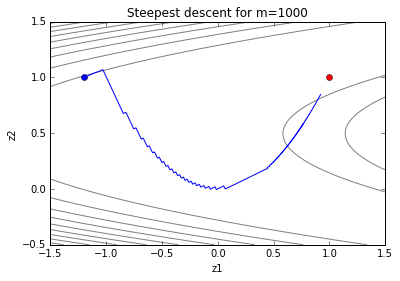

In [664]:
plt.contour(grid[0,:,:], grid[1,:,:], Z, 10,colors='grey', linewidths=1)
plt.plot(z0[0],z0[1], 'bo')
plt.plot(zStar[0], zStar[1], 'ro')
plt.plot(x_hist, y_hist)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Steepest descent for m=1000")

### Problem 2.4

Convergence slows down as $\mathbf{z}^{\ast}$ is approached, and even after 1000 iterations there is still a way to go. To see this slowdown more clearly, plot a vector `distance` with the Euclidean distances between each of the points in `history` (obtained in the previous problem) and $\mathbf{z}^{\ast}$. Label the plot axes meaningfully.

Show code and plot.

### Answer

In [665]:
distances = []
for i in range(len(history)):
    d = np.linalg.norm(history[i] - zStar)
    distances.append(d)    

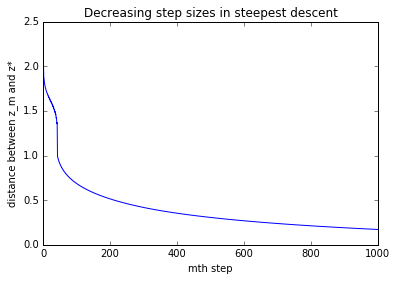

In [666]:
plt.plot(range(len(history)), distances)
plt.xlabel("mth step")
plt.ylabel("distance between z_m and z*")
plt.title("Decreasing step sizes in steepest descent")